# Mutational burden: Growing population

In [3]:
using Revise
using Plots
gr()

Plots.GRBackend()

In [1]:
using Statistics

In [64]:
include("../src/burdenDyn.jl")
using .BurdenDyn

In [92]:
params = Dict(
    "λ"=>5.0,
    "p"=>0.3,
    "μ"=>4.3,
    "N"=>60000,
    "N init"=>1,
    "N max"=>60000,
    "growth rate"=>0.7
)
evolveTime = 25
display(params)

Dict{String,Real} with 7 entries:
  "μ"           => 4.3
  "λ"           => 5.0
  "N"           => 60000
  "N init"      => 1
  "N max"       => 60000
  "p"           => 0.3
  "growth rate" => 0.7

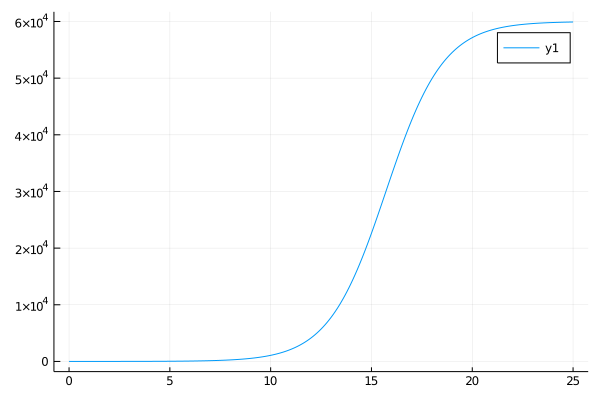

In [93]:
NTime(t) = logisticGrowth(params["N init"], params["N max"], params["growth rate"], t)
# NTime(t) = exponentialCappedGrowth(params["N init"], params["N max"], params["growth rate"], t)
times_t = 0:0.1:evolveTime
f1 = plot(times_t, NTime.(times_t))
display(f1)

# NTimeLin(t) = linearGrowth(params["N init"], params["growth rate"], t)
# # NTime(t) = exponentialCappedGrowth(params["N init"], params["N max"], params["growth rate"], t)
# times_t = 0:0.1:evolveTime
# f2 = plot(times_t, ( t -> params["N init"] + params["N init"]*params["growth rate"]*t ).(times_t))
# display(f2)

In [94]:
mMax = 1500
ϵ = 0.0001
nCells1_m = BurdenDyn.evolveBurden(params, evolveTime, mMax, ϵ);
nCells2_m = BurdenDyn.evolveBurdenGrowth(params, evolveTime, mMax, ϵ);


3.2965597398819914e-5
15
[0.013568559012200934, 0.05834480375246403, 0.12544132806779767, 0.17979923689717664, 0.19328417966446484, 0.16622439451143975, 0.11912748273319845, 0.0731783108218219, 0.03933334206672931, 0.01879259676521508, 0.0080808166090425, 0.003158864674443885, 0.0011319265083423915, 0.0003744064604517137, 0.0001149962699958835, 3.2965597398819914e-5]
3.2965597398819914e-5
15
[0.013568559012200934, 0.05834480375246403, 0.12544132806779767, 0.17979923689717664, 0.19328417966446484, 0.16622439451143975, 0.11912748273319845, 0.0731783108218219, 0.03933334206672931, 0.01879259676521508, 0.0080808166090425, 0.003158864674443885, 0.0011319265083423915, 0.0003744064604517137, 0.0001149962699958835, 3.2965597398819914e-5]


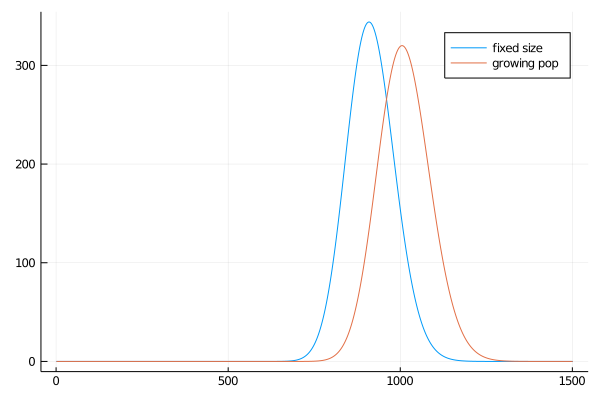

In [95]:
f2 = plot(nCells1_m, label="fixed size")
plot!(nCells2_m, label="growing pop")
# xlims!(1000,1500)
display(f2)

In [96]:

println("number of cells in pop 1: ", sum(nCells1_m))
println("number of cells in pop 2: ", sum(nCells2_m))

mVals_m = 0:length(nCells1_m)-1
mutMean1 = sum(nCells1_m .* mVals_m) / sum(nCells1_m)
mutMean2 = sum(nCells2_m .* mVals_m) / sum(nCells2_m)

nCells1_m .* (mVals_m .- mutMean1).^2

# plot( nCells1_m .* (mVals_m .- mutMean1).^2 / sum(nCells1_m) )

mutVar1 = sum( nCells1_m .* (mVals_m .- mutMean1).^2 ) / sum(nCells1_m)
mutVar2 = sum( nCells2_m .* (mVals_m .- mutMean2).^2 ) / sum(nCells2_m)

println("CP estimated mutation rate in pop 1: ", mutVar1 / mutMean1 - 1)
println("CP estimated mutation rate in pop 2: ", mutVar2 / mutMean2 - 1)

number of cells in pop 1: 59849.87089204563
number of cells in pop 2: 60421.16132293482
CP estimated mutation rate in pop 1: 4.299367599936816
CP estimated mutation rate in pop 2: 4.644204148793096
